In [2]:
import numpy as np

### One-Hot-Encoding

In [ ]:
def one_hot_encoding(y):
  # y should be of shape (row,)
  # and it should be numpy.ndarray
  y = np.array(y)

  # fetch total number of outcomes in vector y.
  row = y.shape[0]

  # calculate unique outcomes and count the frequency of each unique outcome
  unique,count = np.unique(y,return_counts=True)
  # make index variable and this index variable is the column of one hot vector 
  index = unique
  # total columns in one hot vector
  col = len(index)

  # initialize one hot vector
  one_hot_vector = []
  # iterate over row and col
  for i in range(row):
    for j in range(col):
      # check the condition to make one hot vector
      # take an e.g y = [1,2,3,2,1,5,4,3,2,4,5,5]
      # index = [1,2,3,4,5]
      # col = 5, index[1] = 2
      # y[1] == index[1] ==2 append 1 to row1 and col1, and other places append 0.
      if index[j] == y[i]:
        one_hot_vector.append(float(1))
      else:
        one_hot_vector.append(float(0))
  # convert the list into numpy.ndarray
  one_hot_vector = np.array(one_hot_vector)
  # reshape the vector into its respective shape i.e., (row,col) y(12,5)
  one_hot_vector = one_hot_vector.reshape(row,col)
  
  # return one hot vector
  return one_hot_vector

### MaxPooling Layer

In [ ]:
def max_pool(x,window_size):
    row,col = x.shape
    output_array = []
    for i in range(int(row/window_size)):
        for j in range(int(col/window_size)):
            window = x[ window_size*i : (window_size * i) + window_size , window_size*j : (window_size * j) + window_size ]
            output_array.append(np.max(window))
    output_array = np.array(output_array)
    output_array = output_array.reshape(int(row/window_size),int(col/window_size))
    return output_array

### AveragePooling Layer

In [ ]:
def avg_pool(x,window_size):
    row,col = x.shape
    output_array = []
    for i in range(int(row/window_size)):
        for j in range(int(col/window_size)):
            window = x[ window_size*i : (window_size * i) + window_size , window_size*j : (window_size * j) + window_size ]
            output_array.append(np.mean(window))
    output_array = np.array(output_array)
    output_array = output_array.reshape(int(row/window_size),int(col/window_size))
    return output_array

### Neural Network From Scratch

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [26]:
X = np.array([
    [0,0],
    [1,0],
    [0,1],
    [1,1]
])
y = np.array([0,1,1,0])
y = y.reshape(-1,1)

In [27]:
X.shape,y.shape

((4, 2), (4, 1))

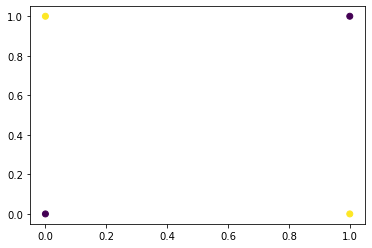

In [28]:
plt.scatter(X[:,0],X[:,1],c = y)
plt.show()

In [29]:
input_size = 2
layers = [4,3]
output_size = 2
epochs = 10

In [30]:
def ReLu(Z):
    return np.maximum(0,Z)

In [31]:
a = ReLu([[-1,2],[3,4],[5,6],[7,8]])
print(a)

[[0 2]
 [3 4]
 [5 6]
 [7 8]]


In [32]:
def softmax(y):
    """
    softmax = e^y(i)/sum(e^y(i))
    """
    
    ea = np.exp(y)
    
    total = ea/np.sum(ea,axis = 1,keepdims=True)
        
    return total

In [10]:
class NeuralNetwork:
    def __init__(self,input_size,layers,output_size):
        model = {}
        #input layer
        model["W1"] = np.random.randn(input_size,layers[0])
        model["b1"] = np.zeros((1,layers[0]))
        #layer1
        model["W2"] = np.random.randn(layers[0],layers[1])
        model["b2"] = np.zeros((1,layers[1]))
        #layer2
        model["W3"] = np.random.randn(layers[1],output_size)
        model["b3"] = np.zeros((1,output_size))
        
        self.model = model
        
    def forward(self,X):
        W1,W2,W3 = self.model["W1"],self.model["W2"],self.model["W3"]
        b1,b2,b3 = self.model["b1"],self.model["b2"],self.model["b3"]
        
        Z1 = np.dot(X,W1) + b1
        A1 = np.tanh(Z1)
        
        Z2 = np.dot(A1,W2) + b2
        A2 = np.tanh(Z2)
        
        Z3 = np.dot(A2,W3) + b3
        A3 = softmax(Z3)
        
        self.activation = (A1,A2,A3)
        
        return A3
    
    def backward(self,X,Y,learning_rate = 0.001):
        W1,W2,W3 = self.model["W1"],self.model["W2"],self.model["W3"]
        b1,b2,b3 = self.model["b1"],self.model["b2"],self.model["b3"]
        
        A1,A2,A3 = self.activation
        
        dZ3 = A3 - Y
        dW3 = np.dot(A2.T,dZ3)
        db3 = np.sum(dZ3,axis = 0)
        
        dZ2 = (1 - np.square(A2)) * np.dot(dZ3,W3.T)
        dW2 = np.dot(A1.T,dZ2)
        db2 = np.sum(dZ2,axis = 0)
        
        dZ1 = (1 - np.square(A1)) * np.dot(dZ2,W2.T)
        dW1 = np.dot(X.T,dZ1)
        db1 = np.sum(dZ1,axis = 0)
        
        self.model['W1'] -= learning_rate*dW1
        self.model['W2'] -= learning_rate*dW2
        self.model['W3'] -= learning_rate*dW3
        
        self.model['b1'] -= learning_rate*db1
        self.model['b2'] -= learning_rate*db2
        self.model['b3'] -= learning_rate*db3
        
    def predict(self,X):
        y_out = self.forward(X)
        return np.argmax(y_out,axis = 1)
    def loss(self,y_opt,p):
        l = np.mean(y_opt*np.log(p))
        return -l
    
    def train(self,X,Y,EPOCHS):
        training_loss = []
        
        y_opt = to_categorical(Y)
        
        for i in range(EPOCHS):
            Y_ = self.forward(X)
            l = self.loss(y_opt,Y_)
            
            self.backward(X,y_opt)
            training_loss.append(l)
            
            print("loss: ",l)

            
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        
        model = {}
        
        model["W1"] = np.random.randn(input_size,layers[0])
        model["b1"] = np.zeros((1,layers[0]))
        
        model["W2"] = np.random.randn(layers[0],layers[1])
        model["b2"] = np.zeros((1,layers[1]))
        
        model["W3"] = np.random.randn(layers[1],output_size)
        model["b3"] = np.zeros((1,output_size))
        
        self.model = model
        
    def train(X,Y,BATCH_SIZE,EPOCHS):
        y_opt = to_categorical(Y)
        for i in range(EPOCHS):
            l = 0.0
            for j in range(int(X.shape[0]/BATCH_SIZE)):
                y_out = self.forward(X[(j*BATCH_SIZE):(j+1)*BATCH_SIZE])
                l += self.loss(y_opt,y_out)
            print("loss ",l)
            self.backward(X,y_opt)
            

In [150]:
class NN:
    def __init__(self,hidden_layers,output_layer,input_layer,activation = "relu"):
        model_layers = {}
        self.activation = activation
#         self.W = None
#         self.b = None
#         self.Z = None
        total_layers = 1 + len(hidden_layers) + 1
        layers = []
        layers.append(input_layer)
        for i in hidden_layers:
            layers.append(i)
        layers.append(output_layer)
        layers = np.array(layers)
        # layers[0]---input_layer
        #layers[total_layer-1]---output_layer
        for layer_no in range(total_layers-1):
            model_layers[layer_no] = [np.random.randn(layers[layer_no],layers[layer_no+1]),np.zeros((1,layers[layer_no+1]))]
        self.model = model_layers
        
    def predict(self,X):
        y_out = self.forward_NeuralNetwork(X)
        print(y_out)
        return np.argmax(y_out,axis = 1)
    def loss(self,y_opt,p):
        l = np.mean(y_opt*np.log(p))
        return -l
    
    def forward_NeuralNetwork(self,X):
        model  = self.model
        W = []
        b = []
        for key in model.keys():
            W.append(model[key][0])
            b.append(model[key][1])
        W = np.array(W)
        Z = []
        A = []
        for i in range(W.shape[0]):
            if i == 0:
                Z.append(np.dot(X,W[0]) + b[0])
                A.append(np.tanh(Z[0]))
                
            else :
                if i == W.shape[0] - 1:
                    Z.append(np.dot(A[i-1],W[i]) + b[i])
                    A.append(softmax(Z[i]))
                else:
                    Z.append(np.dot(A[i-1],W[i]) + b[i])
                    A.append(np.tanh(Z[i]))
        self.activation_units = (A)
        self.W = (W)
        self.b = (b)
        self.Z = (Z)
        print(self.activation_units)
        return A[-1]
        
    def backward_NeuralNetwork(self,X,y,learning_rate = 0.001):
        model  = self.model
        W = self.W
        b = self.b
        A = self.activation_units
        dZ = []
        db = []
        dW = []
        for i in reversed(range(W.shape[0])):
            if i == W.shape[0] - 1:
                dZ.append(A[i] - y)    
            else:
                if i == 0:
                    dZ.append( (1-np.square(A[i])) * np.dot(dZ[W.shape[0]-i-2],W[i+1].T) )
                else:
                    dZ.append( (1-np.square(A[i])) * np.dot(dZ[W.shape[0]-i-2],W[i+1].T) )
                              
        dZ = dZ[::-1]
        for i in range(W.shape[0]):
            if i == W.shape[0] - 1:
                dZ.append(A[i] - y)
                dW.append(np.dot(A[i-1].T,dZ[i]))
                db.append(np.sum(dZ[i],axis = 0))    
            else:
                if i == 0:
                    dZ.append( (1-np.square(A[i])) * np.dot(dZ[i+1],W[i+1].T) )
                    dW.append(np.dot(X.T,dZ[i]))
                    db.append(np.sum(dZ[i],axis = 0))
                else:
                    dZ.append( (1-np.square(A[i])) * np.dot(dZ[i+1],W[i+1].T) )
                    dW.append(np.dot(A[i-1].T,dZ[i]))
                    db.append(np.sum(dZ[i],axis = 0))
            
            W[i] -= learning_rate * dW[i]
            b[i] -= learning_rate * db[i]
    
        self.W = W
        self.b = b
        
        
    
    
    def train(self,X,y,batch_size,epochs,metrics):
        training_loss = []
        
        y_opt = to_categorical(y)
        
        for i in range(epochs):
            
            for j in range(int(X.shape[0]/batch_size) - 1):
                Y_ = self.forward_NeuralNetwork(X[j*batch_size:(j+1)*batch_size])
                l = self.loss(y_opt[j*batch_size:(j+1)*batch_size],Y_)

                self.backward_NeuralNetwork(X[j*batch_size:(j+1)*batch_size],y_opt[j*batch_size:(j+1)*batch_size])
                training_loss.append(l)

            print("loss: ",l)

In [160]:
model = NN([4,3],2,2)

In [161]:
b = model.train(X,y,1,1000,None)

[array([[0., 0., 0., 0.]]), array([[0., 0., 0.]]), array([[0.5, 0.5]])]
[array([[0.80217673, 0.16593598, 0.78390126, 0.40987972]]), array([[-0.69275604, -0.44401118,  0.50242485]]), array([[0.79556956, 0.20443044]])]
[array([[0.92386376, 0.35336575, 0.54510393, 0.33366174]]), array([[-0.16007814, -0.52165716,  0.37467173]]), array([[0.81162304, 0.18837696]])]
loss:  0.8346551051980527
[array([[ 1.68578963e-04, -5.98910903e-04, -1.29104561e-04,
         4.63641406e-06]]), array([[-0.00164082,  0.0009375 , -0.00187607]]), array([[0.4977413, 0.5022587]])]
[array([[0.80215692, 0.16497439, 0.78376971, 0.4099225 ]]), array([[-0.69454086, -0.44141178,  0.49767211]]), array([[0.7921944, 0.2078056]])]
[array([[0.9238762 , 0.3521976 , 0.54483584, 0.33366047]]), array([[-0.16369306, -0.51931827,  0.3692674 ]]), array([[0.80819392, 0.19180608]])]
loss:  0.825635200733101
[array([[ 3.37126190e-04, -1.18486796e-03, -2.58995370e-04,
         8.86374782e-06]]), array([[-0.0032464 ,  0.00186631, -0.003

loss:  0.38257328276630564
[array([[ 0.01031952, -0.01397023, -0.00896111, -0.00026836]]), array([[-0.03922993,  0.04212567, -0.11054673]]), array([[0.38902051, 0.61097949]])]
[array([[0.80221321, 0.13706373, 0.77567013, 0.41311435]]), array([[-0.75448588, -0.29205341,  0.15677713]]), array([[0.51807335, 0.48192665]])]
[array([[0.92485677, 0.30510048, 0.53093658, 0.33612883]]), array([[-0.31475469, -0.38183056,  0.01013033]]), array([[0.53103589, 0.46896411]])]
loss:  0.3786145198507039
[array([[ 0.01042643, -0.01384649, -0.00908288, -0.00028379]]), array([[-0.03889631,  0.04241104, -0.1116682 ]]), array([[0.38814791, 0.61185209]])]
[array([[0.80222471, 0.13707681, 0.77557365, 0.41316604]]), array([[-0.75474558, -0.29037237,  0.15230791]]), array([[0.51434598, 0.48565402]])]
[array([[0.92486909, 0.30481365, 0.53080639, 0.33619478]]), array([[-0.31584134, -0.38024713,  0.00575753]]), array([[0.52737166, 0.47262834]])]
loss:  0.37472297952064176
[array([[ 0.01053144, -0.0137163 , -0.0092

[array([[0.92515201, 0.29913925, 0.52480536, 0.3398878 ]]), array([[-0.34833473, -0.30652654, -0.19235576]]), array([[0.36922838, 0.63077162]])]
loss:  0.23040570920396178
[array([[ 0.01287411,  0.00232004, -0.01744534, -0.00270397]]), array([[ 0.00953669,  0.04838803, -0.15380097]]), array([[0.36458356, 0.63541644]])]
[array([[0.8023    , 0.14832871, 0.77027649, 0.41558335]]), array([[-0.7552882 , -0.21205744, -0.06143373]]), array([[0.34755805, 0.65244195]])]
[array([[0.92514804, 0.29917516, 0.52471751, 0.33993622]]), array([[-0.3484882 , -0.305587  , -0.19475813]]), array([[0.36747119, 0.63252881]])]
loss:  0.22901475560737536
[array([[ 0.01284377,  0.00267714, -0.01760843, -0.00277063]]), array([[ 0.01067259,  0.04834988, -0.15413705]]), array([[0.36457474, 0.63542526]])]
[array([[0.80228561, 0.14861971, 0.77019164, 0.4156057 ]]), array([[-0.75512604, -0.21109002, -0.06407711]]), array([[0.34569926, 0.65430074]])]
[array([[0.92514377, 0.29921376, 0.52462963, 0.33998407]]), array([[

[array([[0.80092177, 0.16366981, 0.76600918, 0.41598146]]), array([[-0.74436571, -0.17283234, -0.16628096]]), array([[0.27881568, 0.72118432]])]
[array([[0.92461591, 0.30316022, 0.52032833, 0.34160105]]), array([[-0.34807946, -0.26767551, -0.2872994 ]]), array([[0.30412811, 0.69587189]])]
loss:  0.18129485261086853
[array([[ 0.00884414,  0.02119517, -0.02666247, -0.00691091]]), array([[ 0.07239241,  0.04379387, -0.16123419]]), array([[0.37320287, 0.62679713]])]
[array([[0.80087823, 0.16400494, 0.76591522, 0.41597625]]), array([[-0.74408859, -0.17214144, -0.16806437]]), array([[0.27773736, 0.72226264]])]
[array([[0.92459799, 0.30327355, 0.52023137, 0.34162292]]), array([[-0.34795473, -0.26700649, -0.28884097]]), array([[0.30314924, 0.69685076]])]
loss:  0.18059200686168841
[array([[ 0.00871085,  0.02159685, -0.02687567, -0.00701468]]), array([[ 0.07378698,  0.04365731, -0.161224  ]]), array([[0.37353814, 0.62646186]])]
[array([[0.80083411, 0.16434021, 0.76582105, 0.41597054]]), array([[

loss:  0.1464672930282964
[array([[-0.00486375,  0.04920911, -0.04372571, -0.01550933]]), array([[ 0.17466416,  0.03223654, -0.14937782]]), array([[0.40738207, 0.59261793]])]
[array([[0.79638393, 0.18699334, 0.75874725, 0.41460036]]), array([[-0.72273455, -0.13076772, -0.2674337 ]]), array([[0.22224201, 0.77775799]])]
[array([[0.92270154, 0.31170274, 0.51280527, 0.342234  ]]), array([[-0.33501011, -0.22700242, -0.37296643]]), array([[0.25342003, 0.74657997]])]
loss:  0.14612627346679385
[array([[-0.00511116,  0.04958392, -0.04398785, -0.01564386]]), array([[ 0.17610024,  0.03205954, -0.14907741]]), array([[0.40798162, 0.59201838]])]
[array([[0.79630253, 0.18729261, 0.7586407 , 0.41457031]]), array([[-0.72243219, -0.13026185, -0.26853422]]), array([[0.22167274, 0.77832726]])]
[array([[0.92266685, 0.31181146, 0.51269556, 0.34223294]]), array([[-0.33481823, -0.22651476, -0.37387838]]), array([[0.25291476, 0.74708524]])]
loss:  0.14578799207501186
[array([[-0.00535989,  0.04995791, -0.0442

[array([[0.9197429 , 0.31754158, 0.50495718, 0.34189139]]), array([[-0.32488925, -0.19458547, -0.42666086]]), array([[0.22398945, 0.77601055]])]
loss:  0.12679458076758796
[array([[-0.02590855,  0.07397652, -0.06359842, -0.02577355]]), array([[ 0.27390075,  0.01939042, -0.12048208]]), array([[0.45634649, 0.54365351]])]
[array([[0.78937143, 0.20595864, 0.75080958, 0.41204882]]), array([[-0.70280386, -0.09660952, -0.33387763]]), array([[0.18898212, 0.81101788]])]
[array([[0.91969592, 0.31758969, 0.5048516 , 0.3418851 ]]), array([[-0.32481965, -0.19416184, -0.42726925]]), array([[0.22365142, 0.77634858]])]
loss:  0.12657683160299563
[array([[-0.02623244,  0.074275  , -0.06387583, -0.02591743]]), array([[ 0.27515888,  0.01921972, -0.12000207]]), array([[0.45707222, 0.54292778]])]
[array([[0.78926203, 0.20617435, 0.75070031, 0.41201114]]), array([[-0.70257144, -0.09616861, -0.33462845]]), array([[0.18861392, 0.81138608]])]
[array([[0.91964881, 0.31763681, 0.50474619, 0.34187883]]), array([[

[array([[-0.04907254,  0.09135399, -0.08203306, -0.0353521 ]]), array([[ 0.35087097,  0.00851634, -0.08458333]]), array([[0.50657815, 0.49342185]])]
[array([[0.78143337, 0.21768996, 0.74361621, 0.40955642]]), array([[-0.69032676, -0.06784927, -0.3775599 ]]), array([[0.16741228, 0.83258772]])]
[array([[0.91626105, 0.31855484, 0.49823509, 0.34156391]]), array([[-0.32565523, -0.16653054, -0.46226668]]), array([[0.20326153, 0.79673847]])]
loss:  0.11361439892536956
[array([[-0.04943636,  0.09157352, -0.08230341, -0.03549275]]), array([[ 0.35190534,  0.00836332, -0.08399817]]), array([[0.50734259, 0.49265741]])]
[array([[0.78130685, 0.21782431, 0.74351169, 0.4095207 ]]), array([[-0.69018967, -0.06742878, -0.37812486]]), array([[0.16712856, 0.83287144]])]
[array([[0.91620603, 0.31853607, 0.49814428, 0.34156152]]), array([[-0.32575088, -0.1661256 , -0.46271716]]), array([[0.20298166, 0.79701834]])]
loss:  0.11343879163920548
[array([[-0.0498006 ,  0.09179191, -0.08257356, -0.03563331]]), arra

[array([[0.77245803, 0.22437858, 0.73678271, 0.40731611]]), array([[-0.6841858 , -0.03962743, -0.41164528]]), array([[0.14984454, 0.85015546]])]
[array([[0.91233659, 0.31527623, 0.49266923, 0.34163089]]), array([[-0.33731673, -0.13922902, -0.48944996]]), array([[0.1851408, 0.8148592]])]
loss:  0.10236996959206505
[array([[-0.0748709 ,  0.10396645, -0.10011654, -0.04476171]]), array([[ 0.41470872, -0.00140362, -0.04183354]]), array([[0.55916762, 0.44083238]])]
[array([[0.7723216 , 0.22444266, 0.73668677, 0.40728644]]), array([[-0.68414103, -0.03921757, -0.41208945]]), array([[0.14960835, 0.85039165]])]
[array([[0.91227659, 0.31520014, 0.49259675, 0.34163558]]), array([[-0.33756019, -0.13883031, -0.48980512]]), array([[0.18488518, 0.81511482]])]
loss:  0.10221314314498324
[array([[-0.07525143,  0.1041138 , -0.10036893, -0.04489297]]), array([[ 0.41552729, -0.00153833, -0.04118573]]), array([[0.55992012, 0.44007988]])]
[array([[0.77218507, 0.22450584, 0.73659097, 0.40725686]]), array([[-0

loss:  0.09213460733928783
[array([[-0.10075968,  0.11202946, -0.11655887, -0.05329805]]), array([[ 0.46433838, -0.01005712,  0.00321173]]), array([[0.60893402, 0.39106598]])]
[array([[0.76289371, 0.22688086, 0.73050365, 0.40552105]]), array([[-0.68370005, -0.0117245 , -0.43931473]]), array([[0.13469853, 0.86530147]])]
[array([[0.90810295, 0.30850828, 0.48828308, 0.34221124]]), array([[-0.35797495, -0.11190419, -0.51171679]]), array([[0.16804795, 0.83195205]])]
loss:  0.09199023493875018
[array([[-0.10113791,  0.11212113, -0.11678942, -0.05341744]]), array([[ 0.46498406, -0.01017742,  0.0038835 ]]), array([[0.60964001, 0.39035999]])]
[array([[0.76275388, 0.2268916 , 0.73041783, 0.40549889]]), array([[-0.68372763, -0.01132634, -0.43967654]]), array([[0.13449453, 0.86550547]])]
[array([[0.90804063, 0.30839049, 0.48822831, 0.34222336]]), array([[-0.35832352, -0.11151142, -0.51201056]]), array([[0.16780798, 0.83219202]])]
loss:  0.09184603647306179
[array([[-0.101516  ,  0.11221211, -0.117

[array([[0.90404026, 0.30000598, 0.48518981, 0.3431962 ]]), array([[-0.38261333, -0.08664712, -0.52949006]]), array([[0.15292713, 0.84707287]])]
loss:  0.08298428027629146
[array([[-0.12529493,  0.11673074, -0.1310635 , -0.06078312]]), array([[ 0.50256732, -0.01764703,  0.04751402]]), array([[0.65349203, 0.34650797]])]
[array([[0.75370029, 0.22637626, 0.72515684, 0.40429119]]), array([[-0.6871373 ,  0.01408367, -0.46129091]]), array([[0.12204835, 0.87795165]])]
[array([[0.90397788, 0.29986406, 0.48514914, 0.34321426]]), array([[-0.38301713, -0.08626359, -0.52974484]]), array([[0.15270246, 0.84729754]])]
loss:  0.08285167743170564
[array([[-0.12565831,  0.1167832 , -0.13127222, -0.06089037]]), array([[ 0.50308404, -0.01775716,  0.04818068]]), array([[0.65413301, 0.34586699]])]
[array([[0.75356227, 0.2263521 , 0.72508072, 0.40427611]]), array([[-0.68721101,  0.01446666, -0.46159716]]), array([[0.1218687, 0.8781313]])]
[array([[0.9039155 , 0.29972186, 0.48510866, 0.3432324 ]]), array([[-0

[array([[0.74475169, 0.22400093, 0.72043261, 0.40350797]]), array([[-0.69297134,  0.03876597, -0.48010592]]), array([[0.11089266, 0.88910734]])]
[array([[0.89990415, 0.2900297 , 0.48286142, 0.34456829]]), array([[-0.41052473, -0.06138216, -0.54555752]]), array([[0.13846451, 0.86153549]])]
loss:  0.07451951190187452
[array([[-0.14891552,  0.11928327, -0.14434071, -0.06757182]]), array([[ 0.53377477, -0.02477082,  0.0914284 ]]), array([[0.69399061, 0.30600939]])]
[array([[0.74461911, 0.2239546 , 0.72036557, 0.40349926]]), array([[-0.69307208,  0.03913013, -0.48037113]]), array([[0.11073416, 0.88926584]])]
[array([[0.89984332, 0.28987548, 0.48283227, 0.344591  ]]), array([[-0.41094921, -0.06101237, -0.54578338]]), array([[0.13825815, 0.86174185]])]
loss:  0.07439976543780456
[array([[-0.14925593,  0.11930844, -0.14452826, -0.06766717]]), array([[ 0.53419288, -0.02487366,  0.09206951]]), array([[0.69455674, 0.30544326]])]
[array([[0.74448663, 0.22390802, 0.72029867, 0.40349064]]), array([[

[array([[0.73574564, 0.22024693, 0.71604577, 0.40310114]]), array([[-0.70056439,  0.06349062, -0.49747709]]), array([[0.10050016, 0.89949984]])]
[array([[0.89573864, 0.27908333, 0.48115003, 0.34628137]]), array([[-0.44017511, -0.03609791, -0.56054267]]), array([[0.1247394, 0.8752606]])]
loss:  0.06661680151936437
[array([[-0.17178712,  0.120359  , -0.15675958, -0.07384675]]), array([[ 0.56026035, -0.03177274,  0.13497982]]), array([[0.73089191, 0.26910809]])]
[array([[0.73562134, 0.22018725, 0.71598741, 0.40309812]]), array([[-0.7006787 ,  0.06383226, -0.49770918]]), array([[0.10036162, 0.89963838]])]
[array([[0.89568065, 0.27892611, 0.48112996, 0.3463074 ]]), array([[-0.44059409, -0.03574602, -0.56074558]]), array([[0.1245541, 0.8754459]])]
loss:  0.06651095982855723
[array([[-0.17209938,  0.12036576, -0.15692693, -0.07393073]]), array([[ 0.56060166, -0.03187017,  0.13558083]]), array([[0.73137954, 0.26862046]])]
[array([[0.73549717, 0.22012743, 0.71592916, 0.40309517]]), array([[-0.7

[array([[0.72748612, 0.21588534, 0.71227956, 0.4030519 ]]), array([[-0.70861481,  0.086278  , -0.51258755]]), array([[0.09154676, 0.90845324]])]
[array([[0.89185289, 0.26832294, 0.48000142, 0.34815115]]), array([[-0.46841906, -0.01247918, -0.57390484]]), array([[0.11267265, 0.88732735]])]
loss:  0.05977065675620378
[array([[-0.19235518,  0.12041616, -0.16769082, -0.07929696]]), array([[ 0.58179239, -0.03835302,  0.17490707]]), array([[0.76205604, 0.23794396]])]
[array([[0.72737128, 0.21581942, 0.71222869, 0.40305338]]), array([[-0.70873266,  0.08659648, -0.51279404]]), array([[0.09142566, 0.90857434]])]
[array([[0.89179837, 0.26816912, 0.47998795, 0.34817915]]), array([[-0.46881655, -0.01214697, -0.57408955]]), array([[0.11250842, 0.88749158]])]
loss:  0.059678120858829266
[array([[-0.19263872,  0.12041185, -0.16784043, -0.07937104]]), array([[ 0.58207701, -0.03844643,  0.17546211]]), array([[0.76247194, 0.23752806]])]
[array([[0.72725658, 0.21575344, 0.71217792, 0.40305492]]), array([

loss:  0.05405142776340019
[array([[-0.21019815,  0.11991166, -0.1770702 , -0.08391229]]), array([[ 0.59916883, -0.0444129 ,  0.21006319]]), array([[0.78748702, 0.21251298]])]
[array([[0.72010608, 0.2113892 , 0.70908403, 0.40326887]]), array([[-0.71646473,  0.10687851, -0.52573424]]), array([[0.08393571, 0.91606429]])]
[array([[0.88832065, 0.25822666, 0.47926143, 0.35006344]]), array([[-0.49413865,  0.00912564, -0.58577466]]), array([[0.10231969, 0.89768031]])]
loss:  0.05397063861080481
[array([[-0.21045516,  0.11990115, -0.1772049 , -0.08397815]]), array([[ 0.59941188, -0.04450315,  0.21057284]]), array([[0.78784224, 0.21215776]])]
[array([[0.72000077, 0.21132141, 0.70903945, 0.40327377]]), array([[-0.71658052,  0.10717476, -0.52592053]]), array([[0.0838295, 0.9161705]])]
[array([[0.8882698 , 0.25807961, 0.47925264, 0.3500924 ]]), array([[-0.49450773,  0.00943803, -0.58594442]]), array([[0.10217494, 0.89782506]])]
loss:  0.05389001819122351
[array([[-0.21071178,  0.11989058, -0.17733

[array([[0.88503555, 0.24864947, 0.47879208, 0.35201583]]), array([[-0.51785014,  0.02940548, -0.59670802]]), array([[0.09321893, 0.90678107]])]
loss:  0.048927116185535295
[array([[-0.22681291,  0.11906817, -0.1857701 , -0.08814009]]), array([[ 0.61452965, -0.05045297,  0.24318611]]), array([[0.80979284, 0.19020716]])]
[array([[0.71326413, 0.20679129, 0.70624147, 0.40369461]]), array([[-0.72417956,  0.12629384, -0.53781307]]), array([[0.0771648, 0.9228352]])]
[array([[0.88498838, 0.24851093, 0.47878673, 0.35204506]]), array([[-0.51818827,  0.02969826, -0.59686471]]), array([[0.09309197, 0.90690803]])]
loss:  0.0488571143743171
[array([[-0.22704458,  0.1190542 , -0.18589139, -0.08819866]]), array([[ 0.61473924, -0.05054037,  0.24365041]]), array([[0.81009438, 0.18990562]])]
[array([[0.71316827, 0.20672418, 0.70620238, 0.40370214]]), array([[-0.72429026,  0.12656854, -0.53798228]]), array([[0.07707174, 0.92292826]])]
[array([[0.88494127, 0.24837254, 0.47878142, 0.35207428]]), array([[-0

[array([[0.88208116, 0.2399277 , 0.47852686, 0.35391095]]), array([[-0.53886921,  0.04784543, -0.60652508]]), array([[0.08546841, 0.91453159]])]
loss:  0.044671632678466376
[array([[-0.24115683,  0.1181031 , -0.19328863, -0.09175234]]), array([[ 0.62730921, -0.05605214,  0.2720506 ]]), array([[0.82796586, 0.17203414]])]
[array([[0.70730966, 0.20248907, 0.70384839, 0.4042476 ]]), array([[-0.73118111,  0.14352501, -0.54835545]]), array([[0.07147257, 0.92852743]])]
[array([[0.88203745, 0.23979804, 0.47852396, 0.35393996]]), array([[-0.53917756,  0.0481199 , -0.60667048]]), array([[0.08535681, 0.91464319]])]
loss:  0.04461062188862166


In [171]:
model.predict(X[3])

[array([[0.98695685, 0.31921897, 0.92049248, 0.71194024]]), array([[-0.83372634,  0.295575  , -0.72687744]]), array([[0.03466731, 0.96533269]])]
[[0.03466731 0.96533269]]


array([1], dtype=int64)

In [172]:
X[3]

array([1, 1])

In [173]:
y[3]

array([0])

In [76]:
c = []
c.append(1)
c.append(2)

In [1]:
c

NameError: name 'c' is not defined

In [174]:
from sklearn.datasets import make_circles

In [175]:
X, y = make_circles(n_samples=500,shuffle=True,random_state=42)

In [176]:
X.shape

(500, 2)

In [177]:
y.shape

(500,)

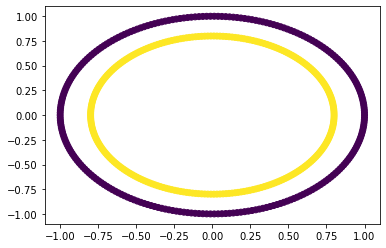

In [181]:
plt.scatter(X[:,0],X[:,1],c= y)

In [191]:
model = NN([6,8,4],2,2)

In [192]:
model.train(x_train,y_train,16,40,None)

[array([[-0.28474851, -0.20750765, -0.68781312,  0.55695359,  0.35151675,
         0.08922194],
       [ 0.53375272,  0.85235024, -0.94286198,  0.31872825, -0.54292306,
        -0.84610255],
       [-0.4862252 , -0.56829975, -0.41048046,  0.56079473,  0.55282727,
         0.45877652],
       [-0.78084368, -0.9314488 ,  0.65878704,  0.45213916,  0.82171918,
         0.90166856],
       [-0.18526016,  0.04456781, -0.85804524,  0.63330395,  0.25862107,
        -0.16847034],
       [-0.65321266, -0.82302674,  0.25825542,  0.47275445,  0.70601797,
         0.76366523],
       [-0.52188213, -0.62740943, -0.32199144,  0.55503562,  0.58685807,
         0.52524594],
       [-0.58094046, -0.66752188, -0.49694128,  0.65981714,  0.65158878,
         0.55091959],
       [ 0.60416413,  0.88691253, -0.94065876,  0.23200799, -0.62177918,
        -0.87634769],
       [-0.41426196, -0.74496431,  0.88761879, -0.28501953,  0.41870461,
         0.74056434],
       [ 0.68928325,  0.82384716,  0.11050192, -0

[array([[-0.74074423, -0.85753299, -0.03486213,  0.58428239,  0.7436076 ,
         0.74860396],
       [-0.58901229, -0.87344499,  0.94247742, -0.29225041,  0.49912753,
         0.84061436],
       [ 0.59293497,  0.72286755,  0.1360115 , -0.46573008, -0.64686603,
        -0.62669977],
       [ 0.25326753,  0.07134523,  0.83412818, -0.59508389, -0.37710718,
         0.04596945],
       [-0.47283403, -0.4350141 , -0.72431912,  0.64091027,  0.50583802,
         0.22376908],
       [-0.56188665, -0.59231929, -0.61757915,  0.63879511,  0.58630892,
         0.39586359],
       [-0.06981797,  0.19576557, -0.81606746,  0.50887543,  0.10584082,
        -0.3093871 ],
       [ 0.03728602, -0.28181421,  0.89265242, -0.56389551, -0.17764147,
         0.3416621 ],
       [-0.71664407, -0.87441625,  0.48235526,  0.37066307,  0.69976712,
         0.7955933 ],
       [-0.70296303, -0.85444361,  0.34346704,  0.41704168,  0.69062549,
         0.76380388],
       [-0.6581569 , -0.74613443, -0.40434719,  0

[array([[-0.71615267, -0.86909937,  0.434902  ,  0.40523137,  0.70041539,
         0.78727974],
       [ 0.67581629,  0.84262781, -0.33690508, -0.34785062, -0.71541112,
        -0.77951468],
       [-0.34262284, -0.19845556, -0.80933373,  0.64000037,  0.4043924 ,
         0.01193784],
       [ 0.56953173,  0.64130106,  0.54046788, -0.57900821, -0.66182208,
        -0.5202824 ],
       [-0.79121933, -0.91311089,  0.35187106,  0.52928394,  0.78707527,
         0.84138258],
       [ 0.1159371 ,  0.50726704, -0.91891601,  0.5654055 , -0.03656378,
        -0.56192306],
       [-0.81081758, -0.93444832,  0.58074546,  0.45996269,  0.7990704 ,
         0.87901263],
       [-0.42809173, -0.42183196, -0.5817173 ,  0.55505792,  0.45868155,
         0.24950506],
       [-0.14571521, -0.45524474,  0.85594367, -0.40029911, -0.0077837 ,
         0.44756746],
       [ 0.34688947,  0.72929091, -0.93683556,  0.48792938, -0.27966453,
        -0.73527443],
       [ 0.52093312,  0.5619826 ,  0.62174244, -0

[array([[-0.56946   , -0.64201668, -0.34692638,  0.55857603,  0.56704229,
         0.47767034],
       [ 0.69030365,  0.88811136, -0.73273849, -0.10183207, -0.71248108,
        -0.84769477],
       [-0.22455021, -0.03381758, -0.75947864,  0.55382966,  0.24502194,
        -0.11917479],
       [ 0.68277606,  0.88807836, -0.76596867, -0.06104265, -0.7020404 ,
        -0.84996864],
       [-0.71272493, -0.85446927,  0.32609946,  0.45997982,  0.69054127,
         0.76028581],
       [ 0.10892105,  0.46092391, -0.85830663,  0.48263792, -0.08401795,
        -0.5146413 ],
       [-0.43406555, -0.33688973, -0.76648122,  0.65543527,  0.46304252,
         0.12619295],
       [-0.77331026, -0.94284764,  0.91386747,  0.07754981,  0.71581369,
         0.90757624],
       [ 0.61493617,  0.86633288, -0.85308302,  0.12235542, -0.62148076,
        -0.83662601],
       [-0.66173971, -0.88133266,  0.8593306 ,  0.03518028,  0.58715661,
         0.82939696],
       [ 0.29199224,  0.21966009,  0.68072421, -0

       [0.49545317, 0.50454683]])]
[array([[-0.80789736, -0.92114474,  0.4017304 ,  0.54664736,  0.79190196,
         0.84952578],
       [-0.70351936, -0.83539292,  0.20190861,  0.49662169,  0.68121669,
         0.72745748],
       [-0.81092761, -0.92453497,  0.43708691,  0.53813237,  0.79405928,
         0.85565579],
       [-0.51990964, -0.80490537,  0.89028509, -0.15235447,  0.3897698 ,
         0.75089582],
       [ 0.68790195,  0.88208437, -0.67551428, -0.1458187 , -0.72523174,
        -0.84163497],
       [-0.63474736, -0.68431438, -0.52020048,  0.6568585 ,  0.6428618 ,
         0.50208435],
       [-0.47546764, -0.47087183, -0.55145557,  0.57472144,  0.47664471,
         0.28242651],
       [-0.03885475,  0.34327862, -0.90257209,  0.6057982 ,  0.07969529,
        -0.44983118],
       [-0.79708486, -0.90907283,  0.28721595,  0.5701651 ,  0.78370603,
         0.82819473],
       [ 0.39980007,  0.344539  ,  0.74720421, -0.54688196, -0.54990371,
        -0.22917679],
       [-0.581

[array([[-0.78288814, -0.8908141 ,  0.1221916 ,  0.60547092,  0.77154373,
         0.79428443],
       [-0.42306743, -0.36956831, -0.62935817,  0.58034064,  0.4208406 ,
         0.1714723 ],
       [ 0.49926695,  0.50797715,  0.65022237, -0.53922024, -0.63058317,
        -0.39727549],
       [-0.61339616, -0.86215234,  0.88151689, -0.03079689,  0.50916242,
         0.80562069],
       [ 0.6845295 ,  0.87692948, -0.65820717, -0.15219385, -0.72955346,
        -0.83850477],
       [ 0.68816804,  0.92002185, -0.92394817,  0.17649714, -0.70113449,
        -0.90157037],
       [-0.43892687, -0.3233648 , -0.77761239,  0.66254801,  0.45685293,
         0.10052253],
       [ 0.14023422,  0.56672815, -0.92471655,  0.56277352, -0.11542514,
        -0.62461783],
       [-0.6406697 , -0.87503629,  0.87448891,  0.01086124,  0.54566334,
         0.8186776 ],
       [ 0.66513495,  0.77603146,  0.2628203 , -0.50900344, -0.75034959,
        -0.69027559],
       [-0.35216315, -0.24021819, -0.69397893,  0

[array([[-0.55217061, -0.60218485, -0.42448843,  0.58470293,  0.55878438,
         0.43443536],
       [-0.76870242, -0.94484365,  0.92188488,  0.09660747,  0.69842543,
         0.90702182],
       [-0.8042767 , -0.91647303,  0.33078531,  0.58304532,  0.79623294,
         0.84327006],
       [-0.49889197, -0.50994246, -0.52545263,  0.58778449,  0.51037683,
         0.33336486],
       [-0.69813072, -0.82766703,  0.13810006,  0.528708  ,  0.68487764,
         0.71853672],
       [-0.63704708, -0.90038996,  0.94385552, -0.14389975,  0.50742746,
         0.85581088],
       [-0.74245047, -0.89227198,  0.54797979,  0.42671466,  0.71281275,
         0.81694099],
       [ 0.67374812,  0.84149402, -0.41487962, -0.26976045, -0.73632916,
        -0.79387708],
       [-0.41469572, -0.74493435,  0.88949145, -0.20332751,  0.24740209,
         0.68321625],
       [-0.79199625, -0.90254164,  0.20928306,  0.60313339,  0.78718369,
         0.81985647],
       [-0.43759289, -0.40013924, -0.60968432,  0

[array([[-0.70089439, -0.76347873, -0.42154847,  0.66047437,  0.68212164,
         0.57933988],
       [ 0.27715544,  0.65129623, -0.88103868,  0.39795504, -0.32182533,
        -0.68919096],
       [ 0.78659771,  0.92415451, -0.66590984, -0.28435755, -0.83423045,
        -0.89683264],
       [-0.51324514, -0.42596735, -0.74854885,  0.66533689,  0.49783488,
         0.17163909],
       [-0.07378795, -0.44370891,  0.84493835, -0.34290488, -0.12803444,
         0.38826903],
       [ 0.66294998,  0.80886274, -0.29917494, -0.305086  , -0.74138607,
        -0.76785282],
       [-0.80021786, -0.90309477,  0.16264119,  0.60667291,  0.77665319,
         0.80300009],
       [ 0.69410639,  0.91885853, -0.91875491,  0.13600837, -0.73013867,
        -0.90605403],
       [-0.66888683, -0.91976206,  0.94136419, -0.08876654,  0.55105738,
         0.87232942],
       [ 0.77674123,  0.90478218, -0.47622863, -0.36783004, -0.83187193,
        -0.87001297],
       [ 0.75198525,  0.86915411, -0.21297536, -0

[array([[-0.74840156, -0.89274662,  0.44525475,  0.46662121,  0.70727799,
         0.79403304],
       [ 0.66225322,  0.79538589, -0.32961555, -0.29209359, -0.7605248 ,
        -0.78095327],
       [-0.433389  , -0.27717466, -0.80456351,  0.65741479,  0.44423214,
         0.03963053],
       [ 0.57265555,  0.53523342,  0.54552158, -0.51558742, -0.73062605,
        -0.52919326],
       [-0.81969625, -0.92792492,  0.36375045,  0.57886603,  0.79991481,
         0.84782304],
       [ 0.01286849,  0.43901521, -0.91690094,  0.57824651, -0.00673926,
        -0.54484117],
       [-0.83414283, -0.94633336,  0.58949565,  0.52099182,  0.80757152,
         0.8834391 ],
       [-0.50144531, -0.49438155, -0.57289317,  0.58455454,  0.48462075,
         0.27174909],
       [-0.15027391, -0.56776905,  0.8582774 , -0.30752002, -0.10506959,
         0.44277867],
       [ 0.25824864,  0.68264448, -0.93533082,  0.50056432, -0.26630526,
        -0.72514954],
       [ 0.52551815,  0.43981809,  0.62613817, -0

[array([[-0.75419894, -0.89742922,  0.44214695,  0.4650089 ,  0.70688697,
         0.79254268],
       [ 0.6631555 ,  0.77937259, -0.32937948, -0.29779705, -0.77558922,
        -0.7842434 ],
       [-0.45162504, -0.2892074 , -0.80581927,  0.65250841,  0.45223146,
         0.04117382],
       [ 0.57887437,  0.4978869 ,  0.5458748 , -0.51735548, -0.75204651,
        -0.5382048 ],
       [-0.82511428, -0.93057844,  0.35990336,  0.57730651,  0.80202403,
         0.8470854 ],
       [-0.00815431,  0.42653768, -0.91731544,  0.57111221, -0.00276881,
        -0.54376372],
       [-0.83846122, -0.94860015,  0.58664699,  0.5201509 ,  0.80845539,
         0.88258266],
       [-0.51567738, -0.5071539 , -0.5752408 ,  0.58010284,  0.48864062,
         0.27142478],
       [-0.14484148, -0.59813719,  0.85796636, -0.30690477, -0.14044487,
         0.43300567],
       [ 0.24039855,  0.67299845, -0.93558423,  0.49204727, -0.26717958,
        -0.72469306],
       [ 0.53247087,  0.39751128,  0.62638415, -0

[array([[-0.50116633, -0.34226332, -0.79530095,  0.65228805,  0.46571285,
         0.06717266],
       [ 0.43035297,  0.75186706, -0.88005911,  0.25294543, -0.53566959,
        -0.78953239],
       [-0.70816294, -0.92283003,  0.84058995,  0.15234375,  0.58015635,
         0.83314786],
       [ 0.78272512,  0.89678797, -0.61778295, -0.33037343, -0.86675079,
        -0.89651367],
       [-0.63901453, -0.90543108,  0.87493542,  0.02799618,  0.4690035 ,
         0.8049866 ],
       [-0.04607887, -0.52948989,  0.83900769, -0.34724964, -0.26561455,
         0.32460091],
       [ 0.77947147,  0.88545507, -0.53627699, -0.36461421, -0.86724778,
        -0.88615061],
       [ 0.68886656,  0.69447229,  0.22373533, -0.50592827, -0.82645586,
        -0.72473839],
       [-0.42426588, -0.81959099,  0.88857722, -0.17986164,  0.16252351,
         0.67609301],
       [-0.45990159, -0.26053588, -0.81885241,  0.6471819 ,  0.42262065,
        -0.01096166],
       [ 0.77895365,  0.91469928, -0.77223409, -0

[array([[ 0.53174845,  0.4504861 ,  0.31619121, -0.43360707, -0.73949246,
        -0.5695034 ],
       [ 0.63338299,  0.68815239, -0.12916052, -0.37717436, -0.79327881,
        -0.74486666],
       [ 0.76966375,  0.86147762, -0.43777879, -0.41732013, -0.8755694 ,
        -0.87565952],
       [-0.00999634, -0.59219124,  0.90490533, -0.46917356, -0.36208255,
         0.35510433],
       [ 0.60290226,  0.6156449 ,  0.04683157, -0.40473603, -0.77843573,
        -0.69126696],
       [-0.72634773, -0.9282774 ,  0.82877922,  0.16687124,  0.59500733,
         0.83341549],
       [ 0.66686298,  0.63009888,  0.30879123, -0.53220734, -0.83050829,
        -0.70021809],
       [-0.62345876, -0.55932587, -0.70212144,  0.6555041 ,  0.58453924,
         0.29382063],
       [ 0.74951198,  0.91464816, -0.85827858, -0.12224294, -0.8404929 ,
        -0.91963519],
       [ 0.74505536,  0.80543882, -0.16417921, -0.47550717, -0.86689654,
        -0.83179769],
       [-0.2558794 , -0.72817354,  0.87460127, -0

loss:  0.3087978799509921
[array([[-0.48293631, -0.36640897, -0.68975461,  0.54972322,  0.39142524,
         0.08657691],
       [ 0.40706484,  0.80041115, -0.94148033,  0.33050849, -0.54125387,
        -0.83737064],
       [-0.64817769, -0.68225092, -0.41619508,  0.55601112,  0.57612973,
         0.44473835],
       [-0.85610612, -0.95752861,  0.65223284,  0.46905512,  0.80725475,
         0.88912044],
       [-0.41162927, -0.1023699 , -0.85911134,  0.61630455,  0.34092753,
        -0.15476487],
       [-0.76542882, -0.88328547,  0.2504076 ,  0.48302573,  0.69635139,
         0.74474989],
       [-0.67500161, -0.73056077, -0.32860362,  0.55156234,  0.60537745,
         0.50954922],
       [-0.7323047 , -0.75181736, -0.50514727,  0.64518678,  0.69388691,
         0.54180635],
       [ 0.50358133,  0.84364128, -0.93890132,  0.25430163, -0.63491784,
        -0.86947727],
       [-0.48646798, -0.86084228,  0.88928458, -0.17767789,  0.18570132,
         0.69750937],
       [ 0.69665569,  0

       [0.39922142, 0.60077858]])]
[array([[ 0.03455109,  0.45460552, -0.87470198,  0.40052181, -0.22507885,
        -0.60944583],
       [ 0.75980518,  0.85709375, -0.50007539, -0.42520323, -0.8916463 ,
        -0.89112232],
       [-0.24557298, -0.7261915 ,  0.86920418, -0.33606718, -0.18937311,
         0.44872989],
       [ 0.64985146,  0.78565982, -0.56034141, -0.28025606, -0.82270411,
        -0.84215131],
       [ 0.54862131,  0.33907014,  0.58187454, -0.57161907, -0.8087058 ,
        -0.55858744],
       [ 0.3592629 , -0.08128363,  0.78248757, -0.56375599, -0.70997196,
        -0.24896122],
       [-0.66947823, -0.60035349, -0.68840239,  0.64459109,  0.60014269,
         0.31854321],
       [ 0.74444141,  0.90513318, -0.83115723, -0.20180657, -0.86647004,
        -0.92256771],
       [-0.09956087, -0.68224841,  0.91337794, -0.47764101, -0.37146   ,
         0.38075244],
       [-0.82330909, -0.96678586,  0.89973656,  0.16491429,  0.69319172,
         0.90002707],
       [ 0.341

       [0.50648683, 0.49351317]])]
[array([[-0.56653946, -0.35989642, -0.80112267,  0.63864578,  0.48315247,
         0.06985747],
       [ 0.3773006 ,  0.72497308, -0.88057081,  0.20640186, -0.56520814,
        -0.79279831],
       [-0.7312614 , -0.9333189 ,  0.83884888,  0.11134511,  0.55096614,
         0.82138046],
       [ 0.77193856,  0.87357541, -0.61077521, -0.39479397, -0.89219539,
        -0.90256552],
       [-0.66231666, -0.91975101,  0.87421405, -0.01898293,  0.42285409,
         0.78968275],
       [-0.06505709, -0.607427  ,  0.84108487, -0.40383484, -0.36099473,
         0.27787306],
       [ 0.7696212 ,  0.85899474, -0.52771851, -0.4281743 , -0.8934481 ,
        -0.89323596],
       [ 0.68263703,  0.62269954,  0.23731151, -0.56283833, -0.86457784,
        -0.74629012],
       [-0.44729425, -0.85044028,  0.88900814, -0.23394871,  0.08086014,
         0.6489498 ],
       [-0.52880856, -0.27960556, -0.8239464 ,  0.63294359,  0.43980393,
        -0.0078389 ],
       [ 0.764

[array([[-0.84530936, -0.91350318,  0.08722792,  0.58883987,  0.79431781,
         0.78903188],
       [-0.56744136, -0.47116263, -0.64599424,  0.54525441,  0.4462461 ,
         0.1686857 ],
       [ 0.51280638,  0.17186836,  0.66033414, -0.59533023, -0.79950615,
        -0.48596276],
       [-0.64934354, -0.91844941,  0.87895828, -0.06443993,  0.38310702,
         0.77473562],
       [ 0.64541231,  0.79206991, -0.65356686, -0.24751719, -0.82211001,
        -0.85431986],
       [ 0.61282106,  0.88002807, -0.9241035 ,  0.07551383, -0.76629751,
        -0.90539532],
       [-0.59630489, -0.40541721, -0.78995138,  0.63250415,  0.510351  ,
         0.11113947],
       [-0.05883874,  0.47807745, -0.92772495,  0.50816282, -0.10800137,
        -0.61882705],
       [-0.67821301, -0.92506271,  0.87139689, -0.02130384,  0.43603552,
         0.79083891],
       [ 0.66803224,  0.57902237,  0.28058781, -0.5753642 , -0.867732  ,
        -0.73888509],
       [-0.50847091, -0.35331145, -0.70770099,  0

[array([[ 0.5119666 ,  0.33400218,  0.32924514, -0.50263637, -0.79595267,
        -0.605663  ],
       [ 0.61318778,  0.6132546 , -0.11588014, -0.44774602, -0.83705953,
        -0.76536193],
       [ 0.75685194,  0.82276145, -0.42497907, -0.48743018, -0.9042972 ,
        -0.88578654],
       [-0.03096333, -0.6786962 ,  0.90729576, -0.53617547, -0.47643557,
         0.29196167],
       [ 0.58324012,  0.52562662,  0.06089458, -0.47467875, -0.82619415,
        -0.71688436],
       [-0.75692238, -0.93874537,  0.82655133,  0.11681289,  0.56163958,
         0.81894104],
       [ 0.6565069 ,  0.53105326,  0.32552883, -0.59743492, -0.87288968,
        -0.72915513],
       [-0.68910312, -0.57156081, -0.7129676 ,  0.64518015,  0.59962587,
         0.2920704 ],
       [ 0.72447854,  0.89646689, -0.85628614, -0.191112  , -0.86736215,
        -0.92346306],
       [ 0.73376177,  0.74979116, -0.14728155, -0.54360103, -0.89913789,
        -0.84687461],
       [-0.28881859, -0.78205008,  0.87627888, -0

[array([[-0.72325159, -0.73150807, -0.37366852,  0.54074831,  0.59420927,
         0.47143726],
       [ 0.61432218,  0.78779491, -0.72582764, -0.21450305, -0.82367729,
        -0.86362935],
       [-0.46602535, -0.20054789, -0.77027435,  0.51840022,  0.26552886,
        -0.11550113],
       [ 0.59945312,  0.79163281, -0.7605627 , -0.1739953 , -0.81179257,
        -0.86442585],
       [-0.80856693, -0.90115795,  0.30090125,  0.45043756,  0.69257669,
         0.74594917],
       [-0.15152439,  0.29711846, -0.86310007,  0.42736273, -0.10951492,
        -0.51384162],
       [-0.64887803, -0.44674973, -0.78054923,  0.63486208,  0.52919816,
         0.143679  ],
       [-0.81993831, -0.96905331,  0.91179635,  0.07121355,  0.64162963,
         0.88979204],
       [ 0.48878534,  0.77282167, -0.85191862,  0.01604444, -0.72543873,
        -0.84648453],
       [-0.72581914, -0.93596607,  0.85716127,  0.01516885,  0.47077132,
         0.79868117],
       [ 0.26534764, -0.2212353 ,  0.69362711, -0

[array([[ 0.50488893,  0.28403543,  0.33586848, -0.52663424, -0.81625205,
        -0.62003298],
       [ 0.60594249,  0.57952918, -0.10929827, -0.47132447, -0.852725  ,
        -0.77340101],
       [ 0.75274512,  0.80459618, -0.41879441, -0.5100275 , -0.91420671,
        -0.88966248],
       [-0.03995183, -0.70875222,  0.90862349, -0.56185863, -0.52140463,
         0.26416619],
       [ 0.57624572,  0.48565832,  0.06792766, -0.49841736, -0.84326775,
        -0.72696362],
       [-0.77053047, -0.94253911,  0.82583956,  0.09657416,  0.54332106,
         0.81187004],
       [ 0.65366222,  0.48664226,  0.33385672, -0.61982351, -0.88738866,
        -0.74035669],
       [-0.71575171, -0.57727095, -0.7180159 ,  0.64462478,  0.60195915,
         0.28944548],
       [ 0.71474557,  0.8880531 , -0.8554356 , -0.21085496, -0.87728209,
        -0.92495367],
       [ 0.73040065,  0.7238788 , -0.13900362, -0.56612468, -0.91016298,
        -0.85265088],
       [-0.30362971, -0.80080718,  0.87733497, -0

loss:  0.27552140710455
[array([[-0.59547433, -0.40677196, -0.70315891,  0.53268039,  0.38359678,
         0.07129379],
       [ 0.29320274,  0.76964674, -0.94270583,  0.29304056, -0.58143229,
        -0.83995487],
       [-0.73150443, -0.70674731, -0.43856619,  0.53840177,  0.57168748,
         0.42644273],
       [-0.89039179, -0.96265212,  0.63794724,  0.43764453,  0.79879911,
         0.87822885],
       [-0.543135  , -0.1353053 , -0.8667363 ,  0.60731115,  0.34711683,
        -0.15807164],
       [-0.82008198, -0.89617777,  0.22762952,  0.45502959,  0.68482191,
         0.72672148],
       [-0.75256596, -0.75235159, -0.3527289 ,  0.53316098,  0.6006257 ,
         0.49102025],
       [-0.80374805, -0.7642133 , -0.52989247,  0.63705692,  0.7026675 ,
         0.53091657],
       [ 0.40809708,  0.81530479, -0.93972111,  0.20882045, -0.67647228,
        -0.87242639],
       [-0.53683447, -0.89606622,  0.89073316, -0.26848727,  0.04737536,
         0.64998652],
       [ 0.68391579,  0.5

[array([[-0.82719328, -0.89572011,  0.19334787,  0.46195394,  0.67992089,
         0.71180877],
       [-0.80397462, -0.96952042,  0.92737595, -0.05950064,  0.52840671,
         0.86661831],
       [-0.5617802 , -0.90492757,  0.89180164, -0.26713769,  0.05578882,
         0.65350858],
       [ 0.69461233,  0.57462508,  0.13594964, -0.61651101, -0.91338424,
        -0.8111329 ],
       [-0.7815276 , -0.79769957, -0.25977967,  0.52704095,  0.62185591,
         0.54011126],
       [-0.54035485, -0.10850962, -0.87434827,  0.60688141,  0.31648431,
        -0.20326383],
       [ 0.06061146,  0.64228678, -0.94089664,  0.41363469, -0.38622722,
        -0.7598116 ],
       [ 0.73846334,  0.86690895, -0.77740875, -0.33925649, -0.90924061,
        -0.92514259],
       [ 0.35578777,  0.7099611 , -0.87448113,  0.10874587, -0.67256638,
        -0.8230462 ],
       [-0.88177435, -0.97316584,  0.83356628,  0.25875374,  0.74303511,
         0.89314728],
       [-0.15598888, -0.73365785,  0.855873  , -0

[array([[ 0.05867071, -0.57430113,  0.80294485, -0.5364241 , -0.63700983,
        -0.02807836],
       [-0.58078125, -0.32316474, -0.74481164,  0.52710145,  0.33226053,
        -0.02494928],
       [ 0.4674252 ,  0.11356494,  0.43584032, -0.5641067 , -0.83382174,
        -0.59254532],
       [-0.78313319, -0.66547075, -0.66639373,  0.64414518,  0.65455969,
         0.38688914],
       [ 0.41448376,  0.7344957 , -0.86288137,  0.04177943, -0.72013285,
        -0.83904312],
       [ 0.54323942,  0.76434651, -0.80313312, -0.13026762, -0.81051972,
        -0.8654313 ],
       [ 0.52342227,  0.26801668,  0.28637906, -0.55209965, -0.85288399,
        -0.67092272],
       [-0.51669798, -0.1914216 , -0.7858244 ,  0.51274668,  0.24472717,
        -0.1469959 ],
       [-0.8416209 , -0.91870595,  0.38072611,  0.40878873,  0.68568579,
         0.75542557],
       [ 0.04507513, -0.68897901,  0.89807967, -0.61654709, -0.65292269,
         0.10524913],
       [-0.49925813, -0.15743093, -0.79451916,  0

[array([[-0.9084376 , -0.96455767,  0.60440501,  0.43161948,  0.78520374,
         0.86292672],
       [-0.01804127,  0.61125511, -0.94142404,  0.42480399, -0.36995667,
        -0.75000636],
       [ 0.00760545, -0.62106657,  0.81118002, -0.53911429, -0.65301374,
        -0.02898887],
       [-0.88064445, -0.97569401,  0.87350285,  0.14350063,  0.671659  ,
         0.88250314],
       [ 0.18492906,  0.6281486 , -0.88697486,  0.20449168, -0.58591753,
        -0.78427545],
       [-0.25956128,  0.39761652, -0.92996863,  0.51367325, -0.10989381,
        -0.60568731],
       [-0.84601403, -0.97426068,  0.91460263, -0.01184742,  0.55655259,
         0.86784604],
       [-0.84325873, -0.94813861,  0.70169937,  0.22578583,  0.60601933,
         0.794986  ],
       [ 0.35571751,  0.70788442, -0.87035623,  0.07075346, -0.71478022,
        -0.83696281],
       [ 0.61376183,  0.66557183, -0.47233308, -0.40560849, -0.88564267,
        -0.85296463],
       [-0.80903311, -0.81439919, -0.24085006,  0

[array([[-0.85028175, -0.90252964,  0.18241311,  0.45450941,  0.66613269,
         0.69827365],
       [-0.81990332, -0.97293214,  0.92769098, -0.09439943,  0.47792999,
         0.8547244 ],
       [-0.5831353 , -0.91653256,  0.89327529, -0.30220614, -0.02602116,
         0.62691399],
       [ 0.69609637,  0.5165035 ,  0.15297234, -0.63884786, -0.92978505,
        -0.82252189],
       [-0.81140488, -0.80879233, -0.27232162,  0.52462927,  0.61066983,
         0.52474447],
       [-0.59795492, -0.13264892, -0.87819743,  0.61255896,  0.31014142,
        -0.21201221],
       [-0.00557915,  0.62189679, -0.94208596,  0.41900357, -0.40663905,
        -0.76261603],
       [ 0.73080657,  0.84947639, -0.77405311, -0.3550863 , -0.92226489,
        -0.92788198],
       [ 0.31500383,  0.68553528, -0.87508255,  0.10419471, -0.69806334,
        -0.82719896],
       [-0.89572237, -0.97553045,  0.83187602,  0.23645665,  0.72263617,
         0.88495175],
       [-0.1710915 , -0.7672544 ,  0.85925366, -0

In [193]:
model.predict(x_train[49])

[array([[ 0.74196787,  0.73206193, -0.36530564, -0.5582883 , -0.93932687,
        -0.89617385]]), array([[-0.98813051,  0.99181516,  0.38205248,  0.34854563, -0.94608485,
        -0.04156175, -0.98793068,  0.88301836]]), array([[ 0.97071889, -0.95289129, -0.61952554,  0.29283741]]), array([[0.58423935, 0.41576065]])]
[[0.58423935 0.41576065]]


array([0], dtype=int64)

In [194]:
y_train[49]

0

In [187]:
x_train = X[:350]
x_test = X[350:]
y_train = y[:350]
y_test = y[350:]

In [188]:
x_train.shape

(350, 2)

In [195]:
model.predict(x_test[0])

[array([[ 0.50160374,  0.16842536,  0.32358906, -0.56952906, -0.87225698,
        -0.67296099]]), array([[-0.94965381,  0.93517238,  0.84706401,  0.3769956 , -0.28976346,
        -0.5271211 , -0.87486827,  0.66435462]]), array([[ 0.91541681, -0.95839678, -0.94188137,  0.17748873]]), array([[0.41289766, 0.58710234]])]
[[0.41289766 0.58710234]]


array([1], dtype=int64)

In [196]:
y_test[0]

1

In [197]:
y_out = []
for i in range(x_test.shape[0]):
    y_out.append(model.predict(x_test[i]))

[array([[ 0.50160374,  0.16842536,  0.32358906, -0.56952906, -0.87225698,
        -0.67296099]]), array([[-0.94965381,  0.93517238,  0.84706401,  0.3769956 , -0.28976346,
        -0.5271211 , -0.87486827,  0.66435462]]), array([[ 0.91541681, -0.95839678, -0.94188137,  0.17748873]]), array([[0.41289766, 0.58710234]])]
[[0.41289766 0.58710234]]
[array([[-0.84994254, -0.94738585,  0.6709968 ,  0.25392723,  0.616944  ,
         0.79340819]]), array([[ 0.97927684, -0.99125572,  0.1209674 , -0.18640377,  0.98359559,
        -0.29466125,  0.97759825, -0.94192478]]), array([[-0.99097364,  0.88901361, -0.25080984, -0.1773954 ]]), array([[0.40202589, 0.59797411]])]
[[0.40202589 0.59797411]]
[array([[ 0.641587  ,  0.31569366,  0.39475545, -0.66449708, -0.92124479,
        -0.75660818]]), array([[-0.97642026,  0.95746976,  0.80078863,  0.15118469, -0.55517666,
        -0.54614863, -0.91793485,  0.6799676 ]]), array([[ 0.89988591, -0.90948316, -0.91080338,  0.58826442]]), array([[0.60954164, 0.3904

[array([[-0.75482364, -0.96637971,  0.94026557, -0.22977561,  0.28649843,
         0.81541143]]), array([[ 0.91198611, -0.97038864,  0.66004146, -0.66897189,  0.99188511,
        -0.54717579,  0.95544547, -0.92487046]]), array([[-0.99568012,  0.99433181, -0.90211335,  0.63790621]]), array([[0.47634418, 0.52365582]])]
[[0.47634418 0.52365582]]
[array([[-0.8326441 , -0.85262974, -0.10564442,  0.50246214,  0.63894599,
         0.60706851]]), array([[ 0.98191181, -0.9676913 , -0.07940386,  0.50415334,  0.95666208,
         0.21039567,  0.91862628, -0.83865814]]), array([[-0.9788635 , -0.0754026 , -0.33051047, -0.87535126]]), array([[0.44927258, 0.55072742]])]
[[0.44927258 0.55072742]]
[array([[ 0.56165186,  0.7322927 , -0.74583815, -0.22835647, -0.85940182,
        -0.87365876]]), array([[-0.96135736,  0.98776434,  0.22139739,  0.81213746, -0.96321127,
         0.20062026, -0.98607393,  0.92634398]]), array([[ 0.9831151 , -0.99423414, -0.55893983, -0.45091185]]), array([[0.27610579, 0.7238

In [207]:
yes = 0
no = 0
for i in range(y_test.shape[0]):
    if y_out[i] == y_test[i]:
        yes += 1
    else:
        no += 1

In [208]:
yes

113

In [209]:
no

37

In [210]:
yes + no == y_test.shape[0]

True

In [213]:
(yes/y_test.shape[0])*100

75.33333333333333